In [10]:
%matplotlib inline

import pandas as pd
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from afinn import Afinn

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation


In [41]:
lyrics_url = 'https://raw.githubusercontent.com/nealcaren/KULeuvenBigData/master/notebooks/data/lyrics.json'
df = pd.read_json('data/lyrics.json')

In [42]:
len(df)

25000

In [43]:
df.head()

,artist,genre,lyrics,song,year
0,anouk,Rock,"Graduated fool,that is what I am\nFor every ti...",graduated-fool,2006
1,blondie,Rock,I still can picture him\nHis hands in his back...,under-the-gun,2006
2,billy-bragg,Rock,One by one the teardrops fall as I write to yo...,one-by-one,2007
3,five-iron-frenzy,Rock,It's New Years Eve and I'm full of empty promi...,news-years-eve,2006
4,burden-brothers,Rock,"If you're going to heaven\nAnd you think, you ...",if-you-re-going-to-heaven,2007


In [48]:
df.sample(10)

,artist,genre,lyrics,song,year
11764,erick-sermon,Hip-Hop,"Def Squad, J. Bleezy!\nHa, com-bust-ya-ble, hu...",we-don-t-care-dirty-version,2006
13207,fat-joe,Hip-Hop,How many emcees must get dissed?\nHow many mot...,part-deux,2006
23824,channel-zero,Metal,"Objection of the rules, God is so selective\nW...",play-a-little,2007
17796,don-williams,Country,"THE OLD TRAIL\nWRITERS CHARLES JOHN QUARTO, ST...",old-trail,2006
16547,connie-smith,Country,"Why me Lord, what have I ever done\nTo deserve...",why-me,2007
19262,avett-brothers,Country,There is a sea and I am a captain\nOf somethin...,may-it-last,2016
22331,exciter,Metal,"Ashes to ashes, dust to dust\nMartial law is r...",martial-law,2007
19415,daniel-o-donnell,Country,"How sweet and happy seem, those days of which ...",if-i-could-hear-my-mother-pray-again,2009
10742,boondox,Hip-Hop,"[Chorus]\nLove me tender, love me true\nGuess ...",love-of-my-knife,2010
23098,avatar,Metal,"Gotta go to work, work, work, work, gotta work...",for-the-swarm,2016


In [12]:
vectorizer = CountVectorizer(lowercase   = True,
                             ngram_range = (1,2),
                             stop_words  = 'english',
                             min_df      = .01,
                             max_features = 400)

In [13]:
vectorizer.fit(df['lyrics'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=400, min_df=0.01,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [14]:
tf_array = vectorizer.transform(df['lyrics'])

In [15]:
lr_classifier = LogisticRegression(solver = 'lbfgs', max_iter= 5000)

In [16]:
lr_classifier.fit(tf_array, df['genre'])

/Users/nealcaren/anaconda3/envs/kuleuven/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
prediction = lr_classifier.predict(tf_array)

In [18]:
accuracy_score(prediction, df['genre'])

0.6026

In [20]:
df['prediction'] = lr_classifier.predict(tf_array)

Rock       1622
Metal      1317
Country    1197
Pop         743
Hip-Hop     121
Name: prediction, dtype: int64

In [23]:
print(classification_report(df['genre'], prediction))

              precision    recall  f1-score   support

     Country       0.57      0.69      0.62      5000
     Hip-Hop       0.85      0.77      0.81      5000
       Metal       0.59      0.81      0.68      5000
         Pop       0.53      0.43      0.47      5000
        Rock       0.45      0.32      0.38      5000

   micro avg       0.60      0.60      0.60     25000
   macro avg       0.60      0.60      0.59     25000
weighted avg       0.60      0.60      0.59     25000



In [26]:
just_rock = df['genre'] == 'Rock'

df[just_rock]['prediction'].value_counts()

Rock       1622
Metal      1317
Country    1197
Pop         743
Hip-Hop     121
Name: prediction, dtype: int64

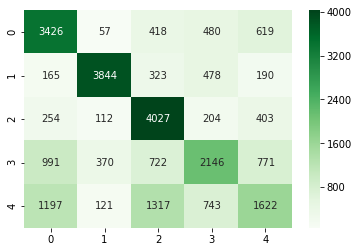

In [27]:
import seaborn as sns

cm = confusion_matrix(df['genre'], prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')

In [28]:
lr_classifier.classes_

array(['Country', 'Hip-Hop', 'Metal', 'Pop', 'Rock'], dtype=object)

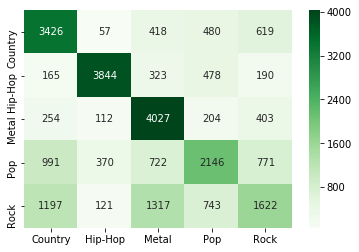

In [29]:
import seaborn as sns

cm = confusion_matrix(df['genre'], prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g', 
            yticklabels = lr_classifier.classes_,
            xticklabels = lr_classifier.classes_,)

In [30]:
lda_model = LatentDirichletAllocation(n_components   = 10)

In [31]:
lda_model.fit(tf_array)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [32]:
def column_swap(column):
    column = column.sort_values(ascending = False)
    return column.index

def topic_words_df(lda_model, vectorizer):
    '''
    Generate dataframe of words associated with a topic model.
    '''
    
    word_topic_scores = lda_model.components_.T
    vocabulary        = vectorizer.get_feature_names()
    
    
    topic_words_df = pd.DataFrame(word_topic_scores,
                                  index = vocabulary)
    
    topic_words_df = topic_words_df.apply(column_swap).reset_index(drop = True).rename_axis('rank')
    
    topic_words_df.index = topic_words_df.index + 1
    
    return topic_words_df

In [33]:
topic_words_df(lda_model, vectorizer).head(10)

,0,1,2,3,4,5,6,7,8,9
rank,,,,,,,,,,
1,just,like,love,got,hey,la,life,da,oh,don
2,ve,nigga,ll,gonna,like,que,world,die,oh oh,want
3,know,got,heart,night,man,mi,ll,na,ah,baby
4,like,shit,know,home,ya,el,time,ich,know,know
5,say,ain,just,like,got,tu,away,und,lord,let
6,way,fuck,gone,time,rock,te,eyes,im,ooh,yeah
7,don,niggas,time,old,come,en,light,di,know know,wanna
8,time,don,long,good,yeah,se,come,du,yeah,just
9,got,bitch,love love,just,uh,yo,god,dem,like,need


In [34]:
topics = lda_model.transform(tf_array)

In [35]:
pd.DataFrame(topics)

,0,1,2,3,4,5,6,7,8,9
0,0.505374,0.002381,0.450972,0.002381,0.002381,0.002381,0.002382,0.002381,0.026985,0.002382
1,0.579546,0.001471,0.001471,0.119996,0.083968,0.069478,0.001471,0.001471,0.139657,0.001471
2,0.003334,0.003334,0.003335,0.003334,0.003334,0.003333,0.969994,0.003333,0.003334,0.003334
3,0.407321,0.002000,0.002001,0.002000,0.002000,0.002000,0.576677,0.002000,0.002000,0.002000
4,0.166506,0.002858,0.002858,0.002858,0.002858,0.002857,0.379395,0.002857,0.002857,0.434096
5,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
6,0.976312,0.002632,0.002632,0.002632,0.002632,0.002632,0.002632,0.002632,0.002632,0.002632
7,0.005264,0.005264,0.364798,0.005264,0.005265,0.056300,0.005265,0.198651,0.143481,0.210448
8,0.004763,0.004763,0.543178,0.167970,0.004763,0.004762,0.255514,0.004762,0.004763,0.004763
9,0.004168,0.004168,0.525883,0.004168,0.004168,0.004167,0.004168,0.004167,0.004167,0.440777


In [36]:
lr_classifier.fit(topics, df['genre'])

/Users/nealcaren/anaconda3/envs/kuleuven/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
prediction = lr_classifier.predict(topics)
accuracy_score(prediction, df['genre'])

0.50132

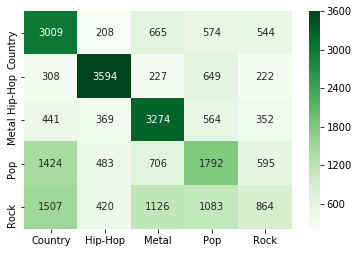

In [38]:
import seaborn as sns

cm = confusion_matrix(df['genre'], prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g', 
            yticklabels = lr_classifier.classes_,
            xticklabels = lr_classifier.classes_,)